# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

### Analisis exploratorio y visualizacion del DataFrame

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [318]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.describe())

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

In [319]:
#analizamos las columnas
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [320]:
#analizamos la cantidad de datos por columna y si hay valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


Text(0.5, 1.0, 'Correlacion entre variables')

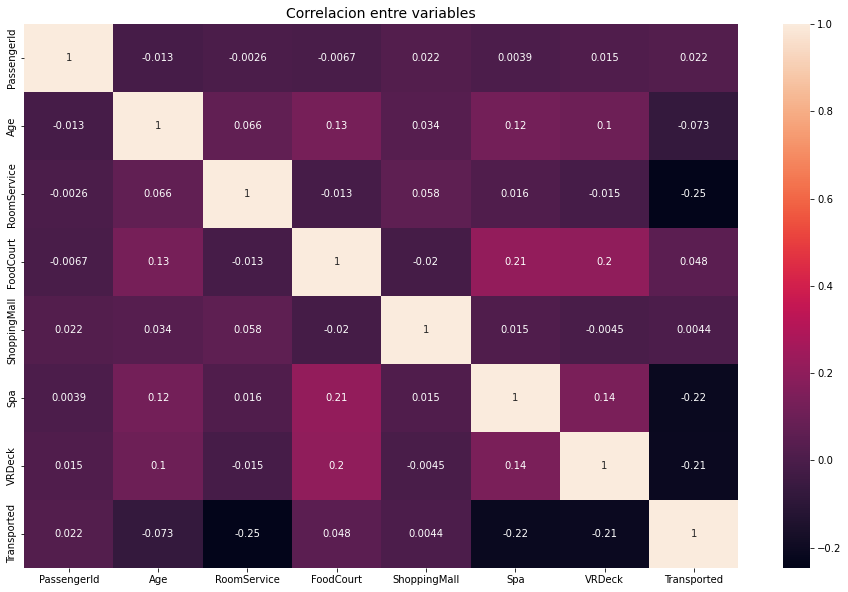

In [321]:
#analizamos si a correlacion entre las variables
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df[df.columns].corr(),annot=True,fmt='.2g')
plt.title('Correlacion entre variables', fontsize=14)

In [322]:
#Analizamos la cantidad de datos faltantes
missing_values_count = df.isna().sum()
missing_values_count

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

### Imputacion y transformacion de variables

In [323]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
#df=imputer.fit_transform(df)
y = df.Transported
X = df.drop('Transported',axis=1)

In [324]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [325]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [326]:
scaler = StandardScaler()

In [327]:
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-0.83428563, -0.74311955,  0.58628937, ..., -0.218395  ,
        -0.25683006,  0.35058466],
       [ 0.32232923, -0.74311955,  0.58628937, ..., -0.28188867,
        -0.06461071,  7.45616684],
       [ 1.47894409,  1.11186335,  1.76945574, ..., -0.28188867,
        -0.26639754, -0.27335294],
       ...,
       [ 1.47894409,  1.11186335,  0.58628937, ..., -0.28188867,
        -0.26639754, -0.27335294],
       [-0.83428563, -0.74311955, -1.78004336, ..., -0.28026063,
         2.20201203, -0.27335294],
       [-0.83428563, -0.74311955,  0.58628937, ...,  2.58509478,
        -0.26639754, -0.23874315]])

In [328]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4320,-0.838536,1.108595,-0.610127,0.290620,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
1437,-0.838536,1.108595,0.579856,-1.316356,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
1690,-0.838536,-0.746493,-0.610127,1.408517,-0.209979,-0.329239,-0.266834,-0.284910,-0.266208,0.366694
3525,1.478619,-0.746493,0.579856,-0.268328,-0.209979,0.784924,-0.278040,-0.100554,0.061583,-0.267088
4700,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,0.166460,-0.281527,-0.266208,-0.267088
...,...,...,...,...,...,...,...,...,...,...
2181,-0.838536,-0.746493,0.579856,1.408517,-0.209979,0.198131,0.001485,-0.271379,-0.266208,-0.267088
2409,0.320042,-0.746493,0.579856,-0.268328,-0.209979,-0.329239,2.593157,-0.284910,2.036346,1.505837
2033,-0.838536,-0.746493,-0.610127,0.709831,-0.209979,-0.329239,-0.278040,-0.284910,0.752795,-0.267088
1364,0.320042,1.108595,-1.800110,0.779700,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088


### Prueba con varios modelos de aprendisaje supervisado

In [329]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 93.90%
Accuracy test Arbol de decisión: 72.01%
Random Forest
Accuracy train Random Forest: 93.90%
Accuracy test Random Forest: 78.98%
Regresión Logística
Accuracy train Regresión Logística: 78.27%
Accuracy test Regresión Logística: 78.72%
Perceptrón multicapa


c:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy train Perceptrón multicapa: 80.92%
Accuracy test Perceptrón multicapa: 79.04%
XGBoost
Accuracy train XGBoost: 89.34%
Accuracy test XGBoost: 78.47%
Naive Bayes
Accuracy train Naive Bayes: 70.45%
Accuracy test Naive Bayes: 70.29%
SVM
Accuracy train SVM: 77.98%
Accuracy test SVM: 78.08%


c:\Users\lucas\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [330]:
#Observamos que los mejores modelos son Random Forest, Perceptrón multicapa y XGBoost

In [354]:
#Usamos neural_network

from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

clf = neural_network.MLPClassifier(
    activation='relu',
    solver='sgd',
    alpha=1e-3, 
    hidden_layer_sizes=(100),
    learning_rate='adaptive',
    learning_rate_init=0.001,
    batch_size=20,
    random_state=1,
    max_iter=5000,
    verbose=True)

In [355]:
clf.fit(x_train, y_train.ravel())

Iteration 1, loss = 0.59631768
Iteration 2, loss = 0.53270301
Iteration 3, loss = 0.50839841
Iteration 4, loss = 0.49418314
Iteration 5, loss = 0.48422296
Iteration 6, loss = 0.47703413
Iteration 7, loss = 0.47109515
Iteration 8, loss = 0.46654008
Iteration 9, loss = 0.46260959
Iteration 10, loss = 0.45946596
Iteration 11, loss = 0.45691455
Iteration 12, loss = 0.45454095
Iteration 13, loss = 0.45270845
Iteration 14, loss = 0.45083074
Iteration 15, loss = 0.44922944
Iteration 16, loss = 0.44793838
Iteration 17, loss = 0.44644238
Iteration 18, loss = 0.44540925
Iteration 19, loss = 0.44414080
Iteration 20, loss = 0.44322513
Iteration 21, loss = 0.44230645
Iteration 22, loss = 0.44130557
Iteration 23, loss = 0.44056766
Iteration 24, loss = 0.43969915
Iteration 25, loss = 0.43893504
Iteration 26, loss = 0.43818388
Iteration 27, loss = 0.43744202
Iteration 28, loss = 0.43679131
Iteration 29, loss = 0.43603170
Iteration 30, loss = 0.43577505
Iteration 31, loss = 0.43522920
Iteration 32, los

MLPClassifier(alpha=0.001, batch_size=20, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=5000, random_state=1,
              solver='sgd', verbose=True)

In [356]:
clf.score(x_test, y_test)

0.7961661341853035

In [357]:
total_params = 0
for case, name in zip(clf.coefs_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

for case, name in zip(clf.intercepts_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

print('total params = ', total_params)

wi = 1000
bias = 100
wi = 100
bias = 1
total params =  1201


In [358]:
np.round(np.exp(clf.predict_log_proba(x_train)),1)

array([[0.3, 0.7],
       [0.4, 0.6],
       [0.8, 0.2],
       ...,
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1]])

In [359]:
predictions = clf.predict(x_train)
print (f'Accuracy: {accuracy_score(y_train, predictions)*100:.2f}')

Accuracy: 80.79


### Usamos VotingClassifier para los mejores modelos

In [337]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier()
clf2 = neural_network.MLPClassifier(
    activation='relu',
    solver='sgd',
    alpha=1e-3, 
    hidden_layer_sizes=(100),
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    batch_size=20,
    random_state=1,
    max_iter=5000,
    verbose=True)#MLPClassifier()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('RF', clf1), ('PM', clf2), ('NE', clf3)], voting='soft')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
print(classification_report(y_test, test_predictions))


Iteration 1, loss = 0.65278896
Iteration 2, loss = 0.63252113
Iteration 3, loss = 0.61641982
Iteration 4, loss = 0.60309397
Iteration 5, loss = 0.59176649
Iteration 6, loss = 0.58201850
Iteration 7, loss = 0.57352919
Iteration 8, loss = 0.56608308
Iteration 9, loss = 0.55947562
Iteration 10, loss = 0.55358749
Iteration 11, loss = 0.54834227
Iteration 12, loss = 0.54361664
Iteration 13, loss = 0.53936340
Iteration 14, loss = 0.53548410
Iteration 15, loss = 0.53195415
Iteration 16, loss = 0.52870493
Iteration 17, loss = 0.52569456
Iteration 18, loss = 0.52292951
Iteration 19, loss = 0.52035584
Iteration 20, loss = 0.51794413
Iteration 21, loss = 0.51566967
Iteration 22, loss = 0.51355194
Iteration 23, loss = 0.51154510
Iteration 24, loss = 0.50963931
Iteration 25, loss = 0.50784206
Iteration 26, loss = 0.50614270
Iteration 27, loss = 0.50450146
Iteration 28, loss = 0.50293572
Iteration 29, loss = 0.50145010
Iteration 30, loss = 0.50003385
Iteration 31, loss = 0.49863608
Iteration 32, los

## Generar la salida para entregar

In [338]:
test_df = pd.read_csv('test.csv')

In [339]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [340]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [341]:
test_id = PassengerId


#aca hay que definir cual es el clasificador que vamos a usar, red neuronal o VotingClassifier
test_pred = eclf1.predict(test_df)


In [342]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

### Posibles mejoras


### Dividimos PassengerId. Un Id único para cada pasajero. Cada Id toma la forma gggg_pp donde gggg indica un grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.
### Otra variable a analizar Cabin- El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde sidepuede ser P por Babor o S por Estribor .

#### Mejorar en el caso de usar VotingClassifier los hiper parametros de cada clasificador

### Resultados:
#### Profesor llego a: 77/77.8 
#### Con estos modelos llegamos a: 78 / 80.79
#### Los pro del kaggle 86.368


## Modelo realizado por el profe, para usar de referencia y tener un mejor accuracy


### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [343]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test {name}: 71.95%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [344]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decisión: 81.88%
Accuracy test Arbol de decisión: 76.36%


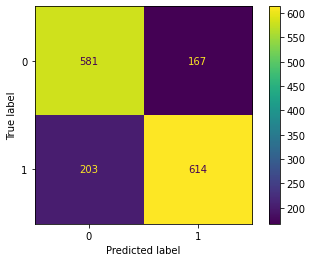

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       748
           1       0.79      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [345]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [346]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.59
Precisión test fold 1: 77.80
Precisión test fold 2: 78.51
Precisión test fold 3: 77.22
Precisión test fold 4: 76.50
Avg. accuracy = 77.7242359467059
